# Forwards Model

In [68]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [69]:
claremont = pd.read_csv('claremont.csv')
claremont_test = pd.read_csv('claremont_test.csv')

In [70]:
features = ['floor_area', 'latitude', 'bedrooms', 'garage', 'bathrooms', 'nearest_stn_dist', 'build_year']

X_train = claremont[features].to_numpy()
y_train = claremont['price'].to_numpy()

X_test = claremont_test[features].to_numpy()
y_test = claremont_test['price'].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
forward_linear_reg = LinearRegression()
forward_linear_reg.fit(X_train, y_train)

y_pred = forward_linear_reg.predict(X_test)

print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared=False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE: 110137.77
R^2: 0.8746


# OLS

In [72]:
features = ['floor_area', 'latitude', 'bedrooms', 'garage', 'bathrooms', 'nearest_stn_dist', 'build_year', 
            'longitude', 'nearest_sch_rank', 'nearest_sch_dist', 'cbd_dist', 'land_area']

X_train = claremont[features].to_numpy()
y_train = claremont['price'].to_numpy()

X_test = claremont_test[features].to_numpy()
y_test = claremont_test['price'].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
forward_linear_reg = LinearRegression()
forward_linear_reg.fit(X_train, y_train)

y_pred = forward_linear_reg.predict(X_test)

print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared=False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE: 138945.54
R^2: 0.8005


# Lasso

In [74]:
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [75]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

mse_ = np.mean(-scores)
print(np.sqrt(mse_))

277361.7386973024


In [76]:
alpha = 10000

lasso_model = Lasso(alpha=alpha)
scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

mse_ = np.mean(-scores)
rmse = np.sqrt(mse_)

print(rmse)

251032.6084490382


In [77]:
alpha = 50_000

lasso_model = Lasso(alpha=alpha)
scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

mse_ = np.mean(-scores)
rmse = np.sqrt(mse_)

print(rmse)

256994.07522835786


In [78]:
alphas = np.linspace(0, 50_000, 100)

scores = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

    mse_ = np.mean(-cv_scores)
    rmse = np.sqrt(mse_)

    scores.append(mse_)

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.485e+11, tolerance: 6.999e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemen

In [79]:
len(X_train)

45

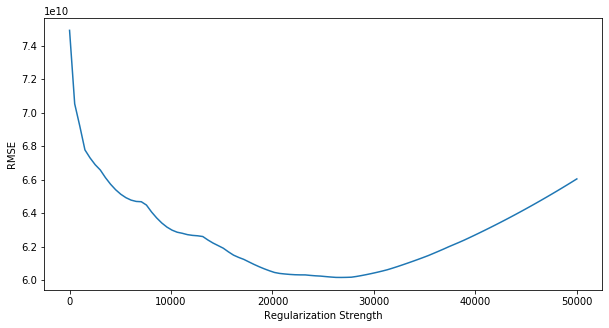

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(alphas, scores)

plt.ylabel("RMSE")
plt.xlabel("Regularization Strength");

In [81]:
arg_with_min_score = np.argmin(scores)
best_alpha = alphas[arg_with_min_score]

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

print('Alpha: {:.2f}'.format(best_alpha))
print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

Alpha: 26767.68
RMSE: 127652.40
R^2: 0.8316


In [85]:
list(zip(features, lasso_model.coef_))

[('floor_area', 140900.12583737916),
 ('latitude', -113777.66667522468),
 ('bedrooms', 166672.15976171923),
 ('garage', 47198.548716181576),
 ('bathrooms', -0.0),
 ('nearest_stn_dist', 41213.45125841991),
 ('build_year', -0.0),
 ('longitude', 0.0),
 ('nearest_sch_rank', -0.0),
 ('nearest_sch_dist', -0.0),
 ('cbd_dist', 0.0),
 ('land_area', 0.0)]

In [88]:
non_zero_features = [feature for feature, coef in zip(features, lasso_model.coef_) if abs(coef) > 1e-6]
non_zero_features

['floor_area', 'latitude', 'bedrooms', 'garage', 'nearest_stn_dist']

In [89]:
X_train = claremont[non_zero_features].to_numpy()
y_train = claremont['price'].to_numpy()

X_test = claremont_test[non_zero_features].to_numpy()
y_test = claremont_test['price'].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Alpha: {:.2f}'.format(best_alpha))
print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

Alpha: 26767.68
RMSE: 148685.00
R^2: 0.7715


# Ridge

In [92]:
from sklearn.linear_model import Ridge

In [122]:
X_train = claremont[features].to_numpy()
y_train = claremont['price'].to_numpy()

X_test = claremont_test[features].to_numpy()
y_test = claremont_test['price'].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

mse_ = np.mean(-scores)
print(np.sqrt(mse_))

277361.7386973024


In [124]:
alpha = 1
model = Ridge(alpha=alpha)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

mse_ = np.mean(-scores)
print(np.sqrt(mse_))

251686.98376466564


In [125]:
alpha = 10
model = Ridge(alpha=alpha)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

mse_ = np.mean(-scores)
print(np.sqrt(mse_))

256774.1251655458


In [129]:
# alphas = np.linspace(0, 10, 100)
alphas = np.logspace(-6, 6, 100)

scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

    mse_ = np.mean(-cv_scores)

    scores.append(mse_)

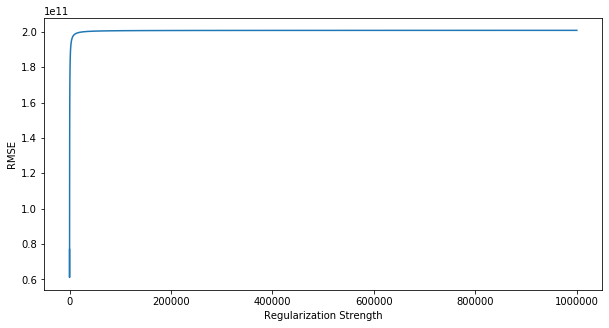

In [130]:
plt.figure(figsize=(10, 5))
plt.plot(alphas, scores)
plt.ylabel("RMSE")
plt.xlabel("Regularization Strength");

In [131]:
arg_with_min_score = np.argmin(scores)
best_alpha = alphas[arg_with_min_score]

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

print('Alpha: {:.2f}'.format(best_alpha))
print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

Alpha: 2.66
RMSE: 116742.03
R^2: 0.8592


In [117]:
alphas = np.logspace(-6, 6, 100)
alphas

array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.31012970e-06,
       3.05385551e-06, 4.03701726e-06, 5.33669923e-06, 7.05480231e-06,
       9.32603347e-06, 1.23284674e-05, 1.62975083e-05, 2.15443469e-05,
       2.84803587e-05, 3.76493581e-05, 4.97702356e-05, 6.57933225e-05,
       8.69749003e-05, 1.14975700e-04, 1.51991108e-04, 2.00923300e-04,
       2.65608778e-04, 3.51119173e-04, 4.64158883e-04, 6.13590727e-04,
       8.11130831e-04, 1.07226722e-03, 1.41747416e-03, 1.87381742e-03,
       2.47707636e-03, 3.27454916e-03, 4.32876128e-03, 5.72236766e-03,
       7.56463328e-03, 1.00000000e-02, 1.32194115e-02, 1.74752840e-02,
       2.31012970e-02, 3.05385551e-02, 4.03701726e-02, 5.33669923e-02,
       7.05480231e-02, 9.32603347e-02, 1.23284674e-01, 1.62975083e-01,
       2.15443469e-01, 2.84803587e-01, 3.76493581e-01, 4.97702356e-01,
       6.57933225e-01, 8.69749003e-01, 1.14975700e+00, 1.51991108e+00,
       2.00923300e+00, 2.65608778e+00, 3.51119173e+00, 4.64158883e+00,
      

# Enet

In [132]:
from sklearn.linear_model import ElasticNetCV

In [133]:
features = ['floor_area', 'latitude', 'bedrooms', 'garage', 'bathrooms', 'nearest_stn_dist', 'build_year', 
            'longitude', 'nearest_sch_rank', 'nearest_sch_dist', 'cbd_dist', 'land_area']

X_train = claremont[features].to_numpy()
y_train = claremont['price'].to_numpy()

X_test = claremont_test[features].to_numpy()
y_test = claremont_test['price'].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
alphas = np.logspace(-4, 0, 100)
ratios = np.linspace(0, 1, 20)

enet_model = ElasticNetCV(alphas=alphas, l1_ratio=ratios, cv=5)
enet_model.fit(X_train, y_train)

In [135]:
y_pred = enet_model.predict(X_test)

print('l1 ratio: {:.2f}'.format(enet_model.l1_ratio_))
print('Alpha: {:.2f}'.format(enet_model.alpha_))

print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

l1 ratio: 0.68
Alpha: 0.25
RMSE: 115224.52
R^2: 0.8628
